In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.2

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.129 Seconds
Building LP ...
	Done. Took 0.107 Seconds
Building M ...
	Done. Took 0.247 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.542 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 2.108*(-0.101)^t + 18.615*(0.583)^t + -8.727*(0.213)^t + -9.816*(-0.081)^t + -2.114*(0.209)^t + -14.432*(0.650)^t + 14.365957 * delta(t,0)
		RMSE = 0.080
		Matlab: [  2.11  -0.1   18.62   0.58  -8.73   0.21  -9.82  -0.08  -2.11   0.21 -14.43   0.65]
	Done. Took 62.030 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 2.837*(0.539)^t + -3.936*(0.435)^t + -0.946*(-0.363)^t + 4.387*(-0.107)^t + 9.997*(0.026)^t + 1.038*(0.049)^t + -13.376919 * delta(t,0)
		RMSE = 0.004
		Matlab: [ 2.84  0.54 -3.94  0.44 -0.95 -0.36  4.39 -0.11 10.    0.03  1.04  0.05]
	Done. Took 87.878 Sec

{0: {1: array([  2.11,  -0.1 ,  18.62,   0.58,  -8.73,   0.21,  -9.82,  -0.08,  -2.11,   0.21, -14.43,   0.65]),
  2: array([ 2.84,  0.54, -3.94,  0.44, -0.95, -0.36,  4.39, -0.11, 10.  ,  0.03,  1.04,  0.05])},
 1: {0: array([ 2.53,  0.08,  3.62, -0.02, -4.31,  0.06,  4.72,  0.  ,  0.72,  0.04, -7.92, -0.  ]),
  2: array([ 6.81,  0.  ,  5.28,  0.05, -8.32,  0.05, -0.21,  0.1 ,  2.07,  0.07, -0.05,  0.1 ])},
 2: {0: array([-6.01,  0.  ,  0.69, -0.02,  1.68,  0.  , -0.24, -0.03,  0.72,  0.02, -1.62, -0.  ]),
  1: array([  1.03,  -0.39, -14.48,  -0.02,  15.74,   0.93,  17.08,   0.06,  -2.92,   0.4 , -16.07,   0.89])}}

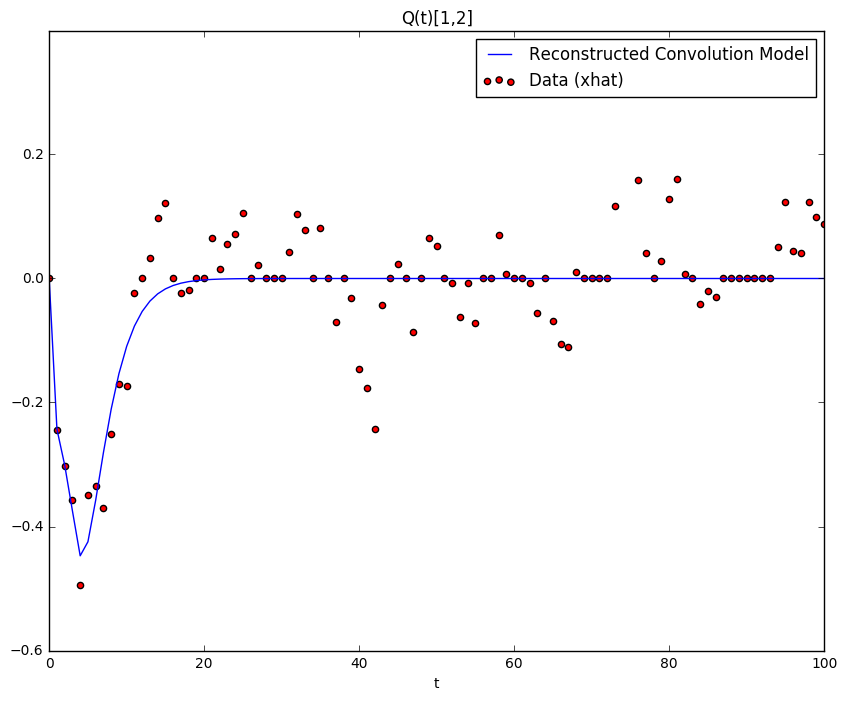

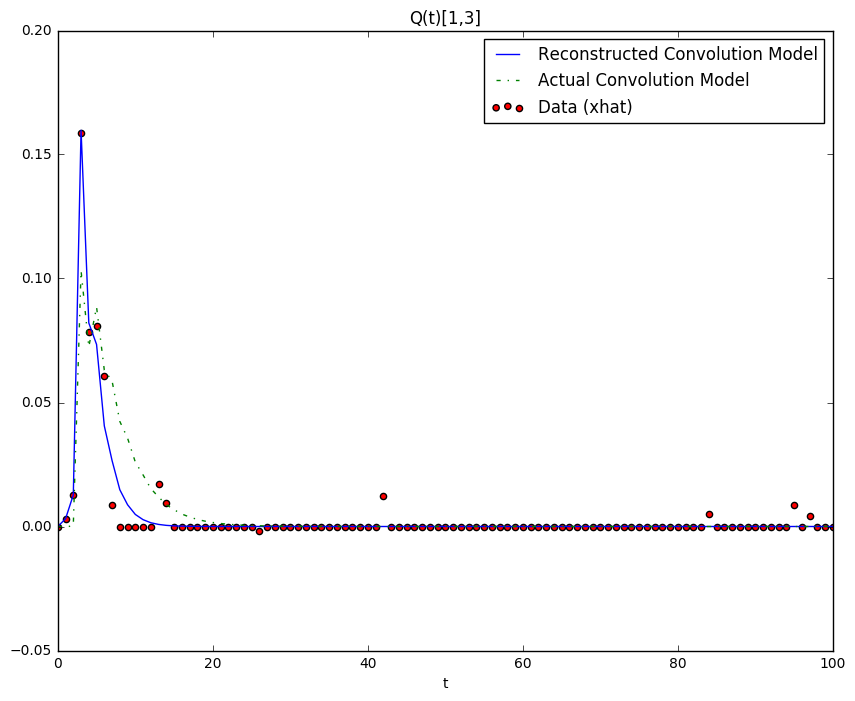

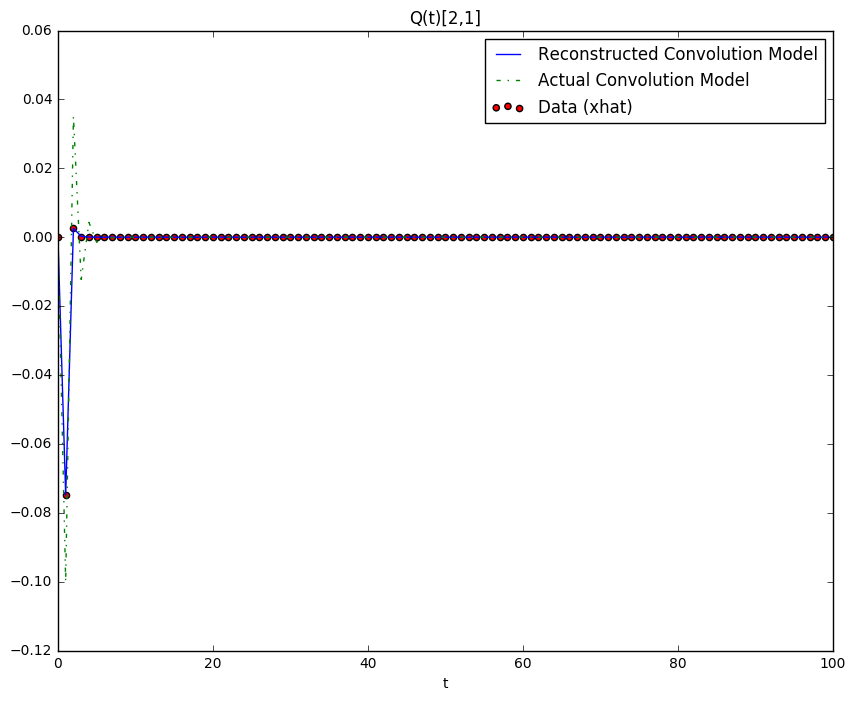

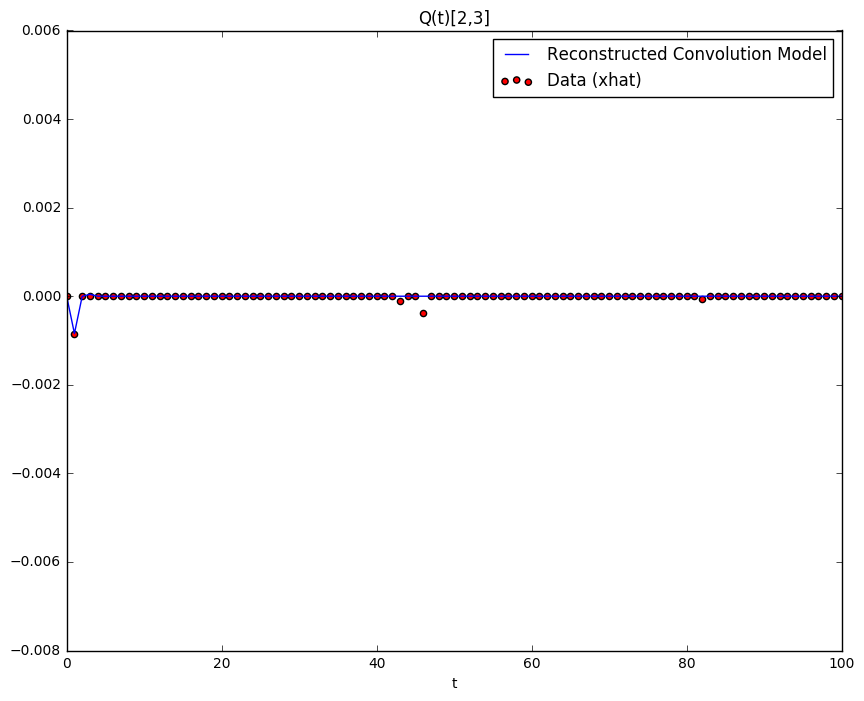

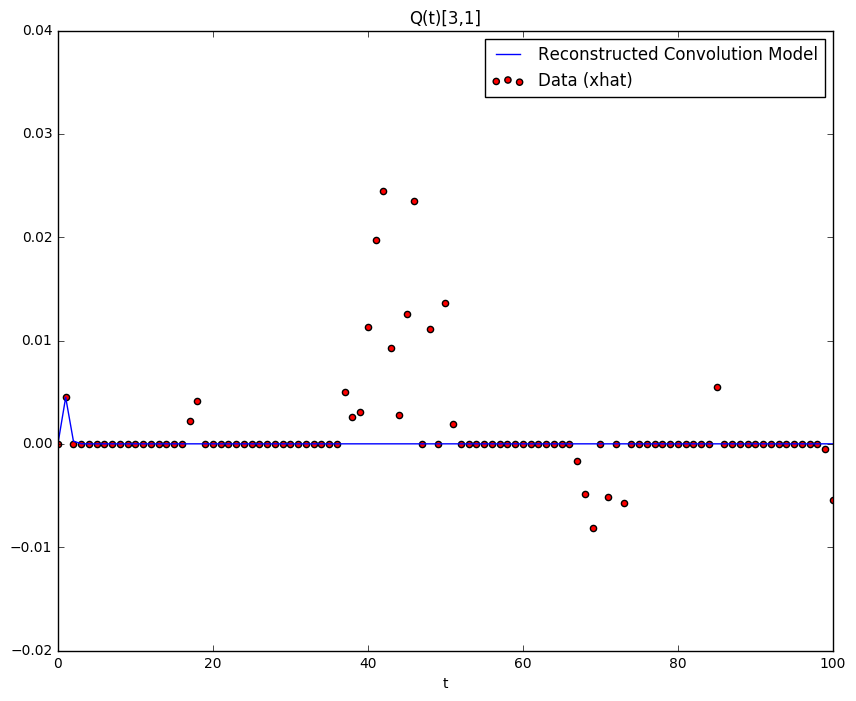

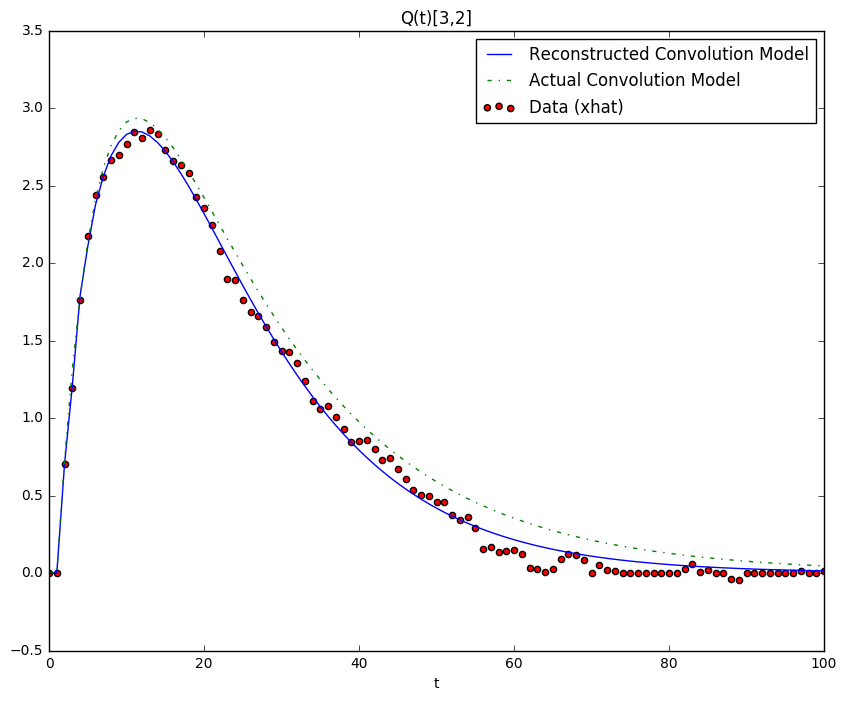

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=20, order=6, real_params=real_params, robust=True)
recon.measured(y, u + np.random.randn(u.shape[0], u.shape[1]) * gamma, plot=True)  #, ij=(1,3))